In [331]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
from embcomp.test_cases.utils import plot
from embcomp.test_cases.neighborhood import plot_neighborhood

def gather_test_cases():
    import embcomp.test_cases.neighborhood as mod
    return [
        getattr(mod, name)
        for name in filter(lambda x: x.startswith("case"), dir(mod))
    ]

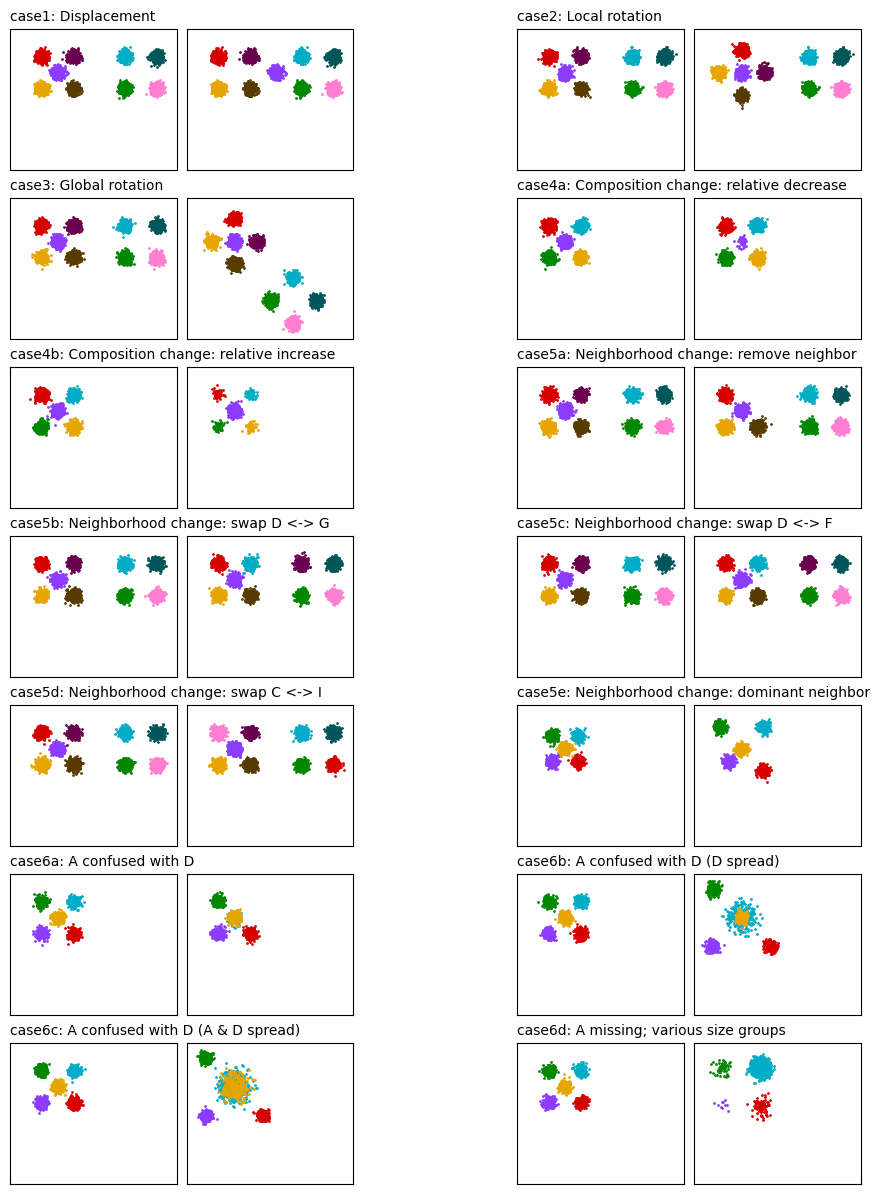

In [333]:
import matplotlib.pyplot as plt
from math import ceil

cases = gather_test_cases()

fig, axs = plt.subplots(ncols=2, nrows=ceil(len(cases) / 2), figsize=(12, 15), sharex=True, sharey=True)

for ax, case in zip(axs.flat, cases):
    ax.set_title(f"{case.__name__}: {case.__doc__}", fontsize='medium', loc='left') 
    plot(*case(), ax=ax)

## Testing

In [334]:
import functools

from embcomp.test_cases.metrics import count_first, fixed_k

def run(metrics):
    cases = gather_test_cases()
    for case in cases:
        plot_neighborhood(*case(), metrics=metrics, name=f"{case.__name__}: {case.__doc__}")

### Fixed _k_

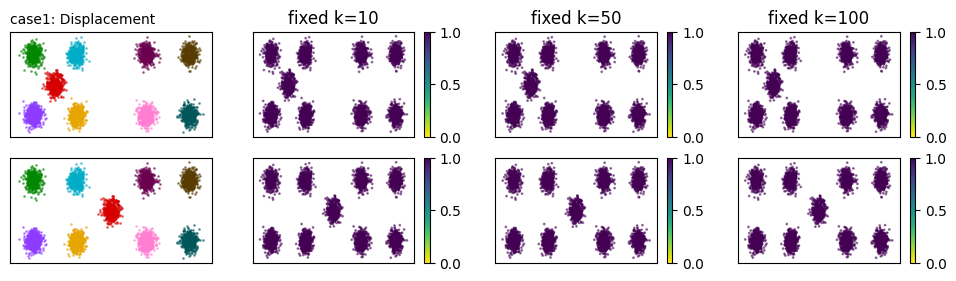

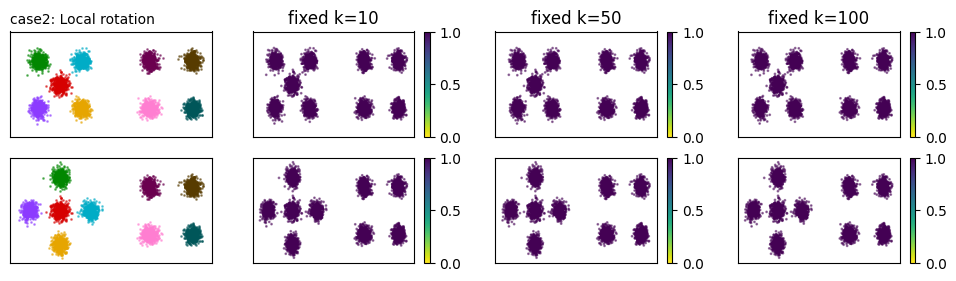

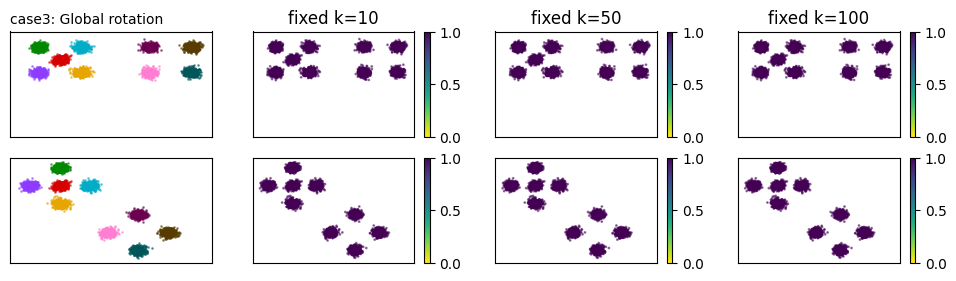

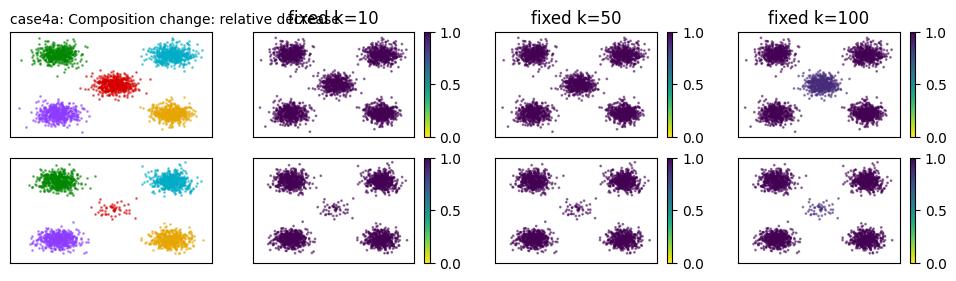

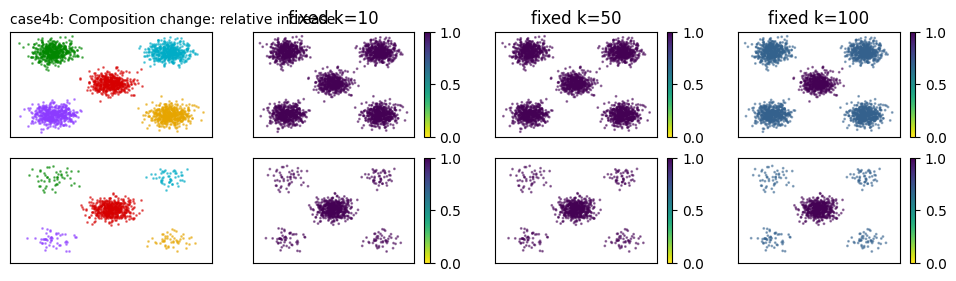

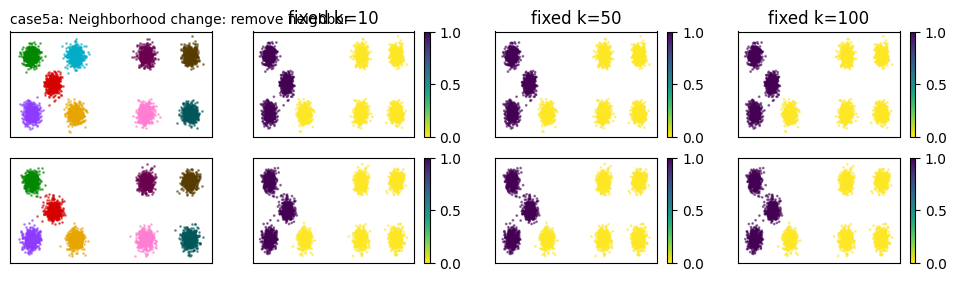

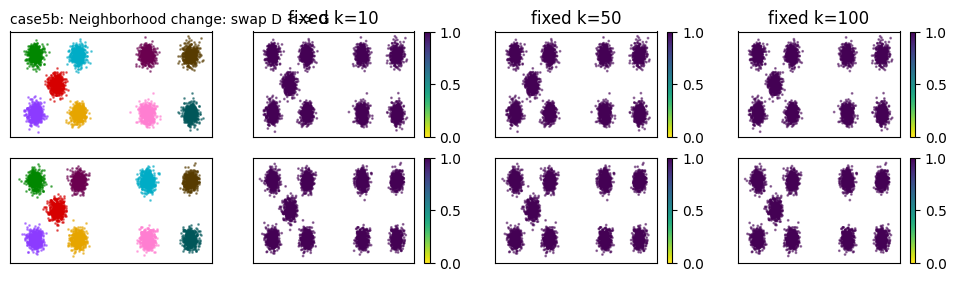

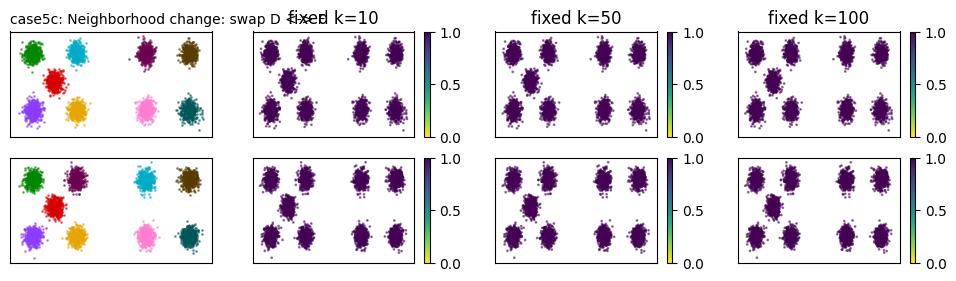

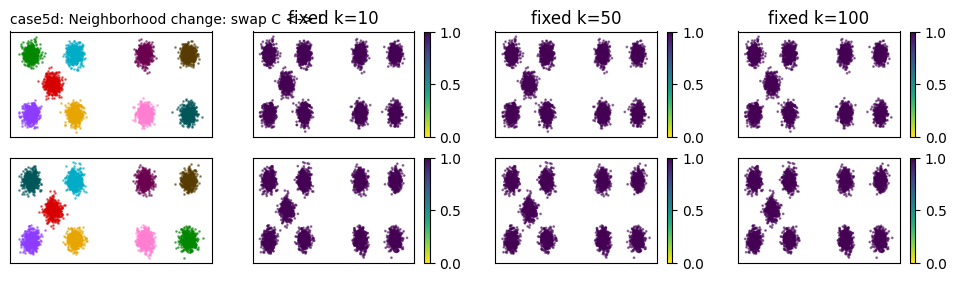

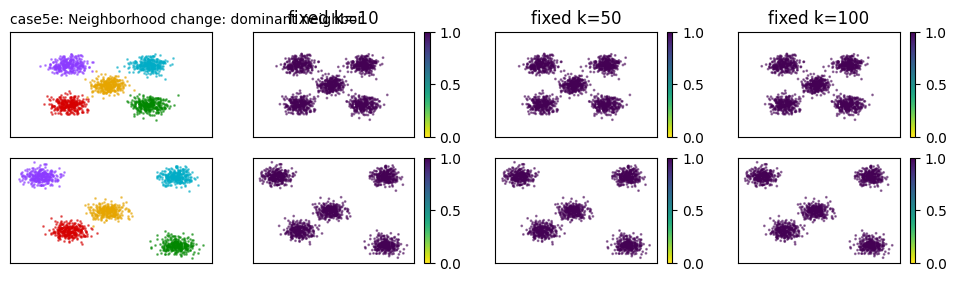

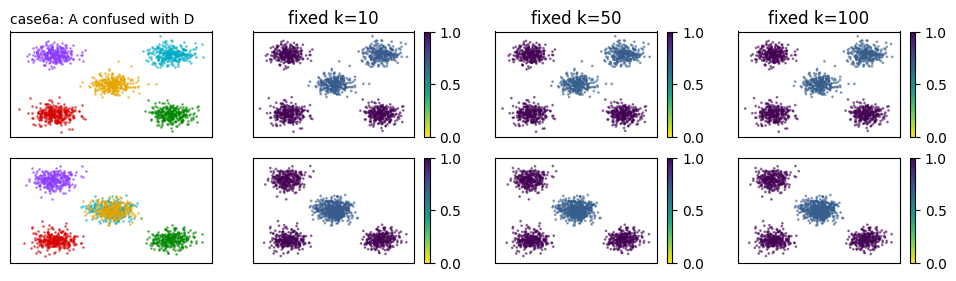

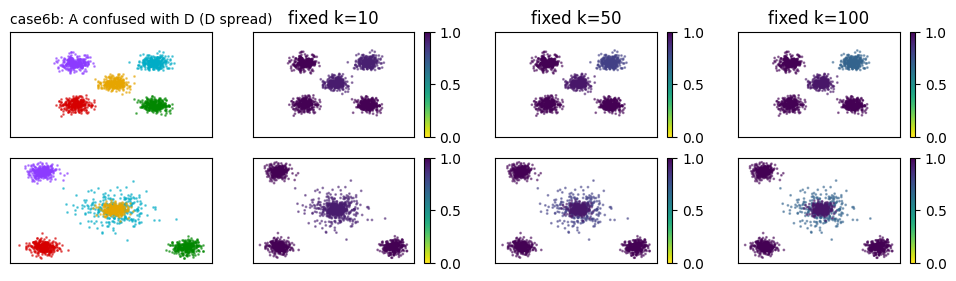

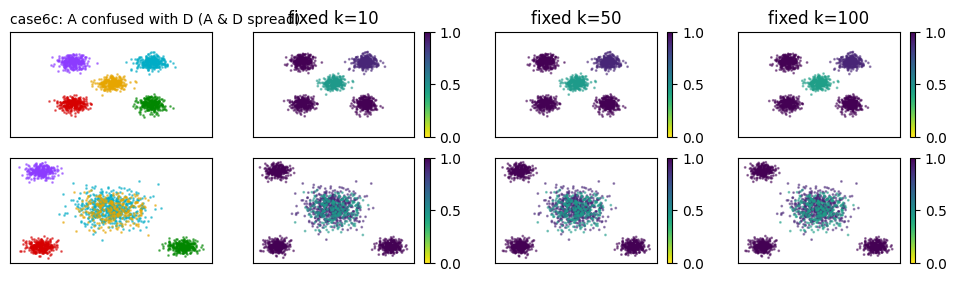

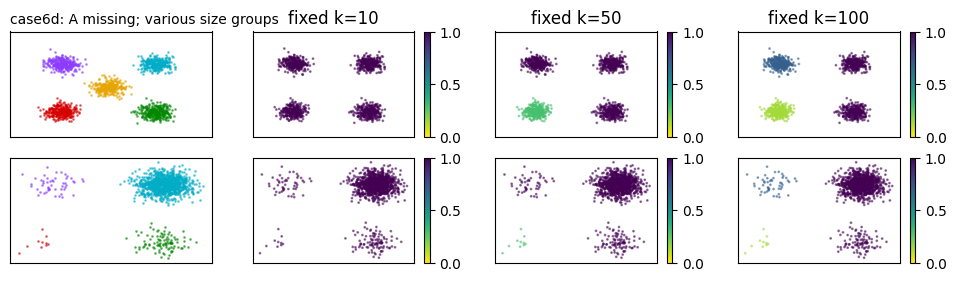

In [335]:
run([
    ("fixed k=10", functools.partial(fixed_k, k=10)),
    ("fixed k=50", functools.partial(fixed_k, k=50)),
    ("fixed k=100", functools.partial(fixed_k, k=100)),
])

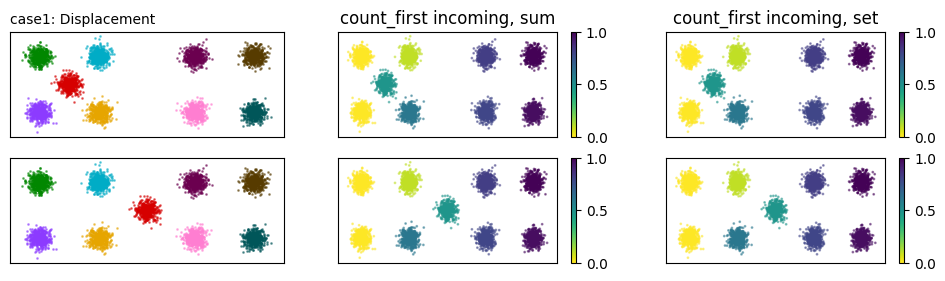

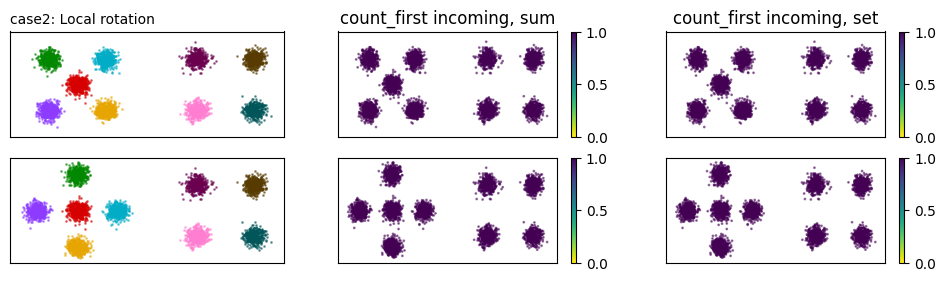

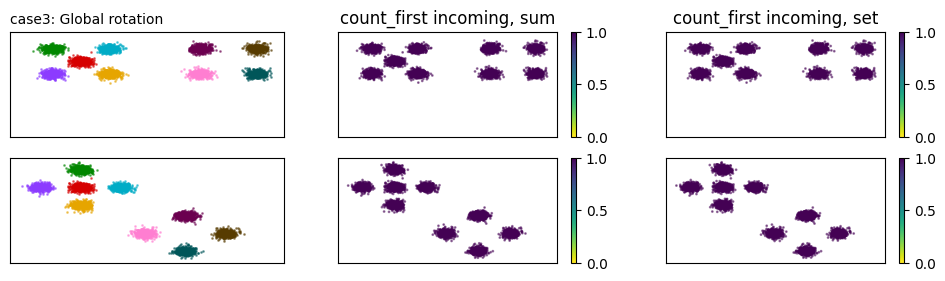

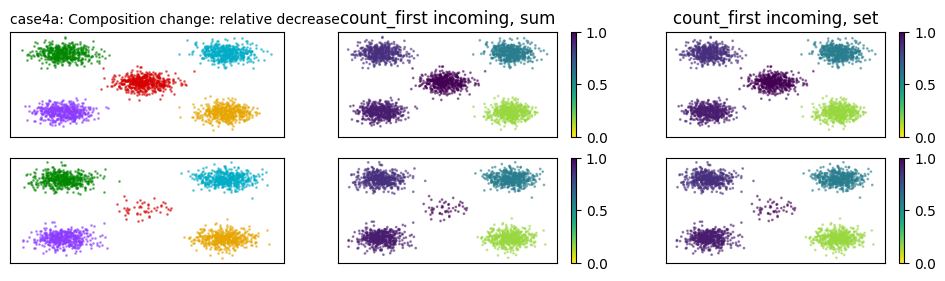

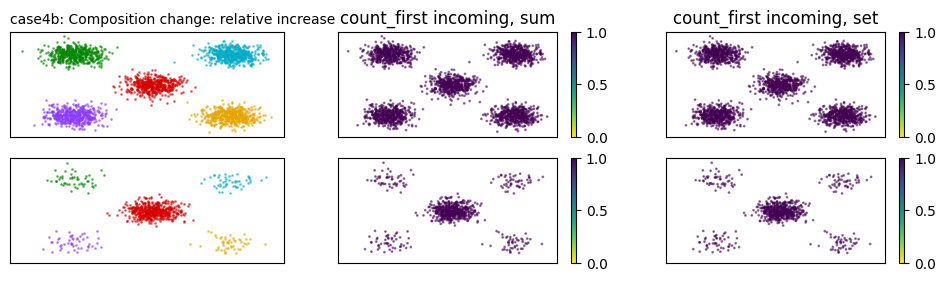

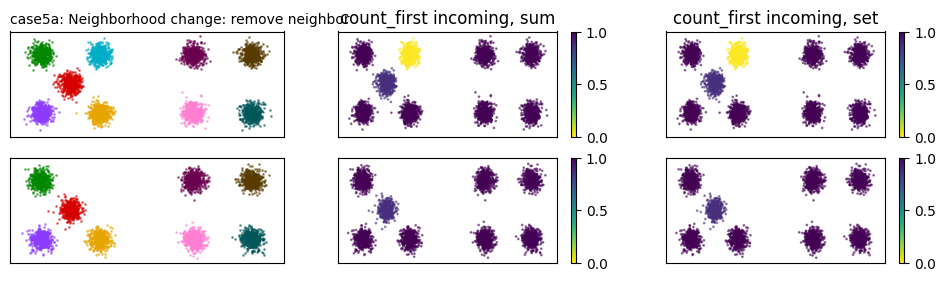

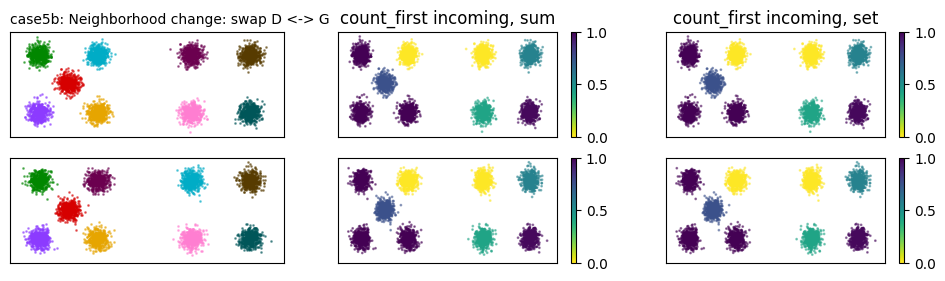

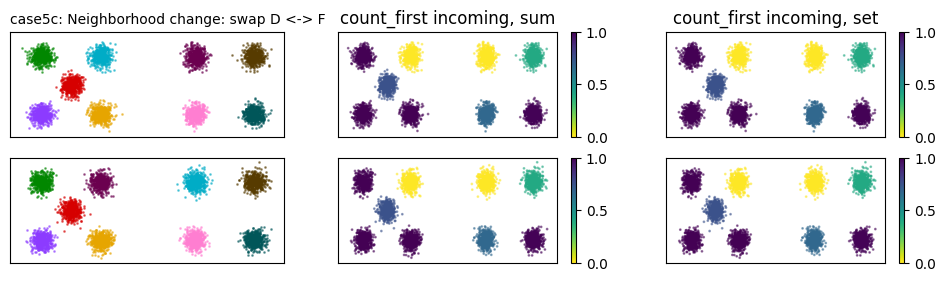

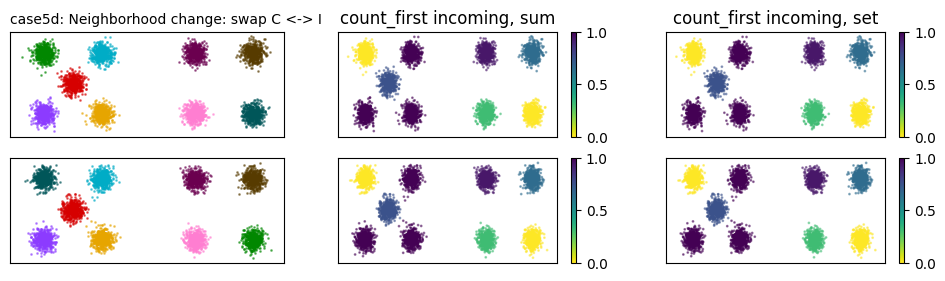

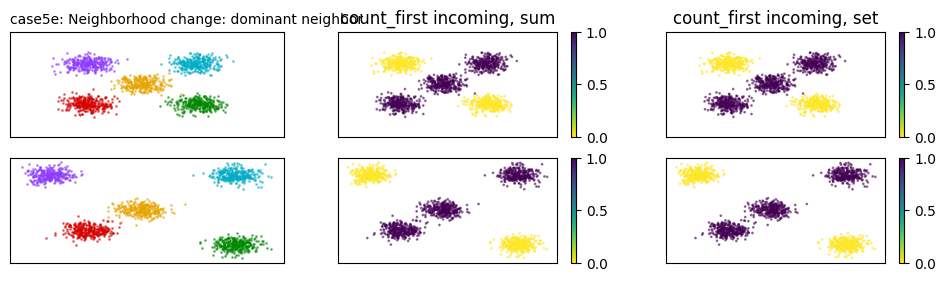

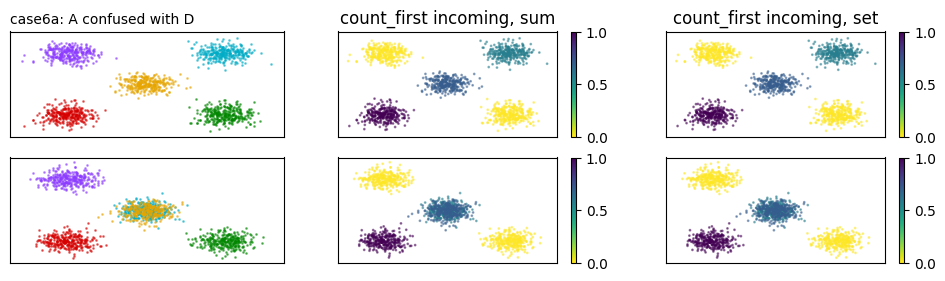

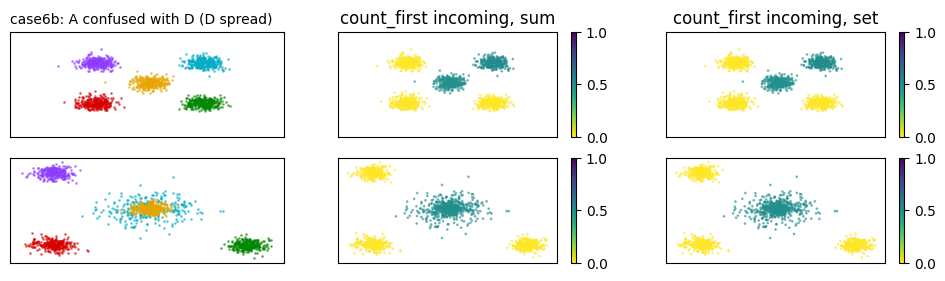

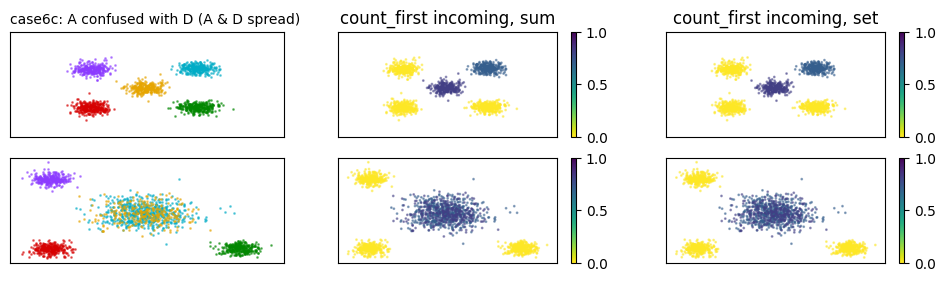

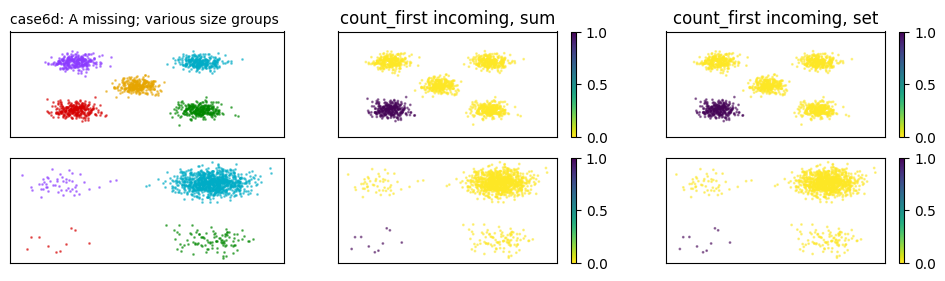

In [339]:
run([
    ("count_first incoming, sum", functools.partial(count_first, type="incoming", agg="sum")),
    ("count_first incoming, set", functools.partial(count_first, type="incoming", agg="set")),
])

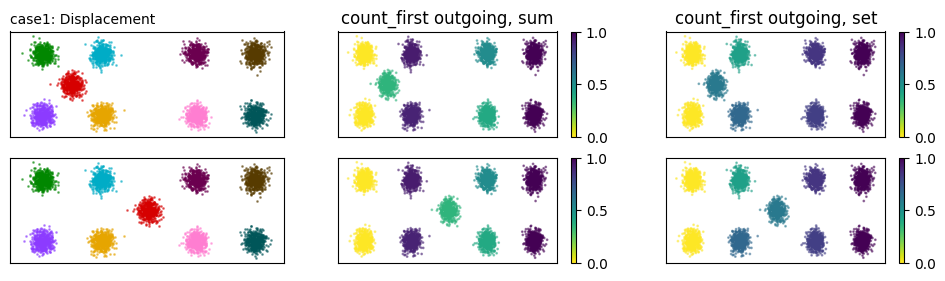

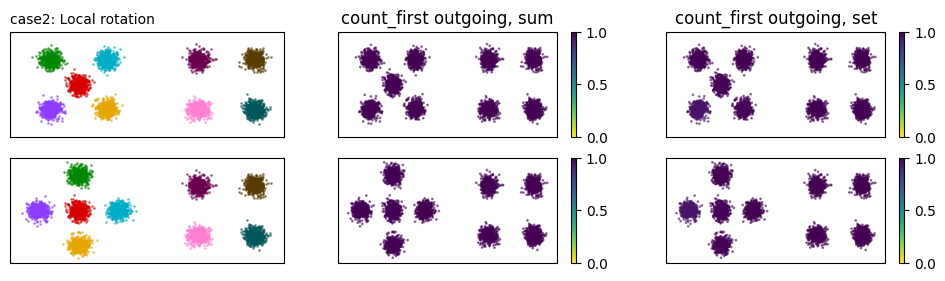

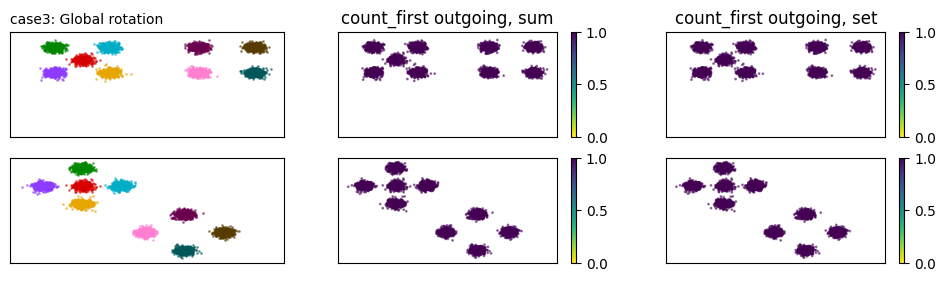

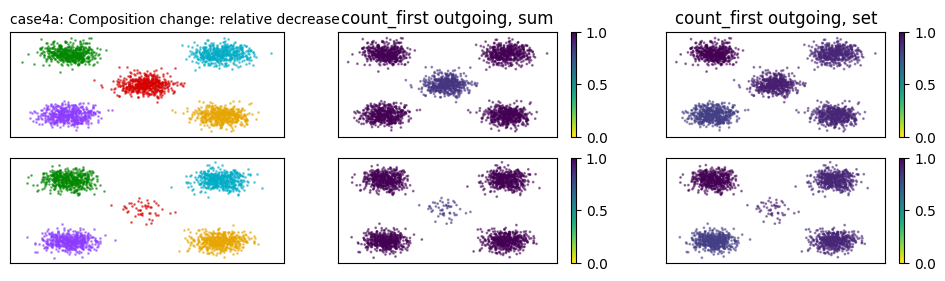

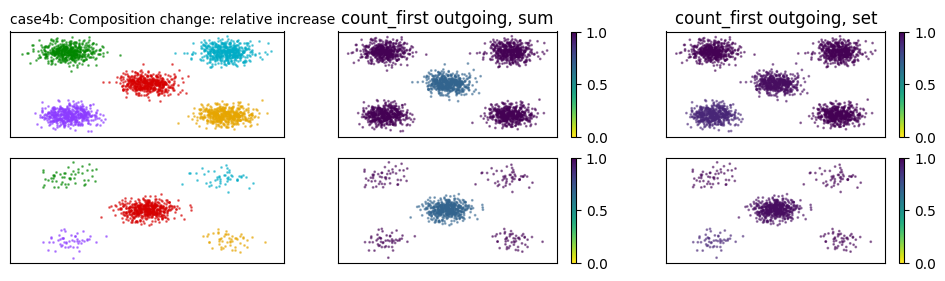

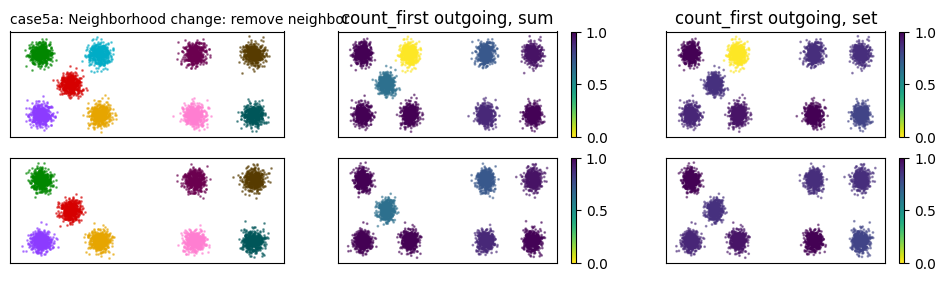

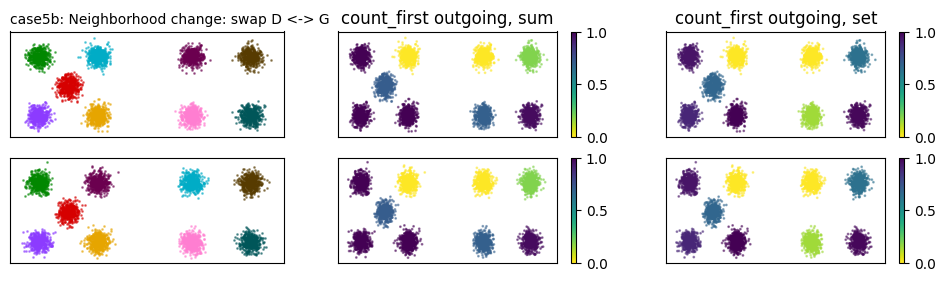

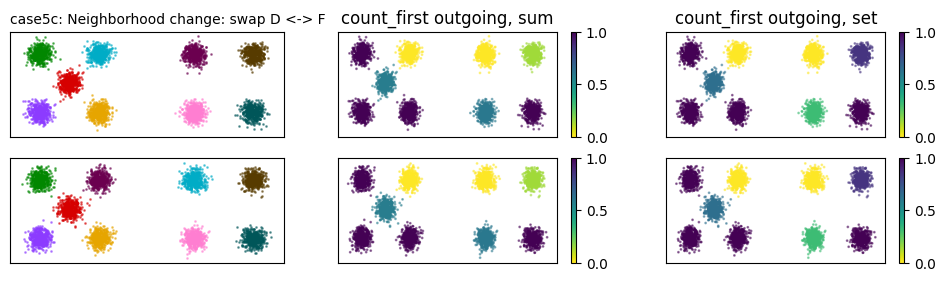

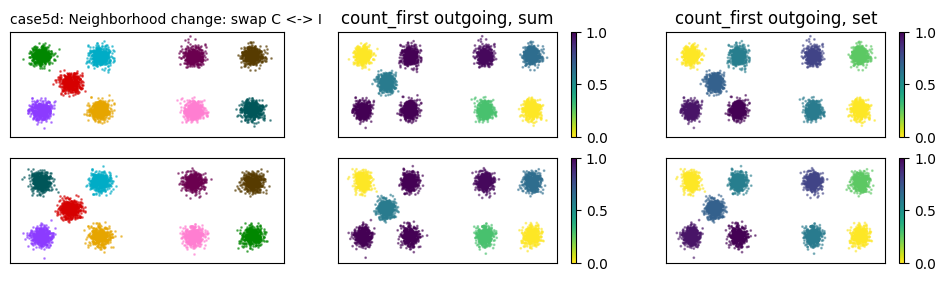

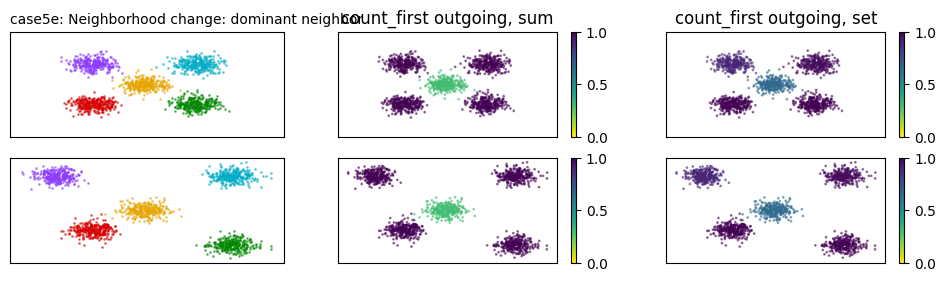

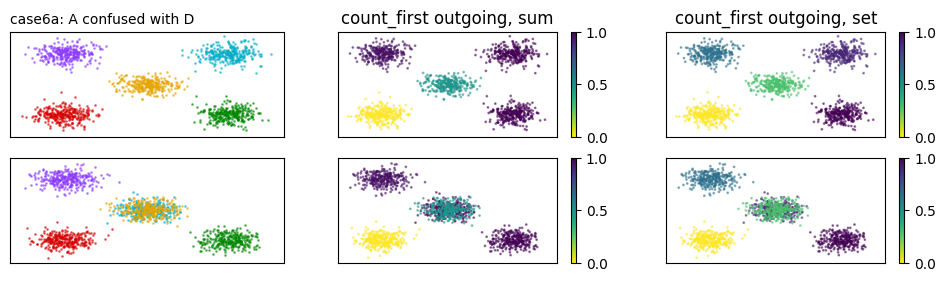

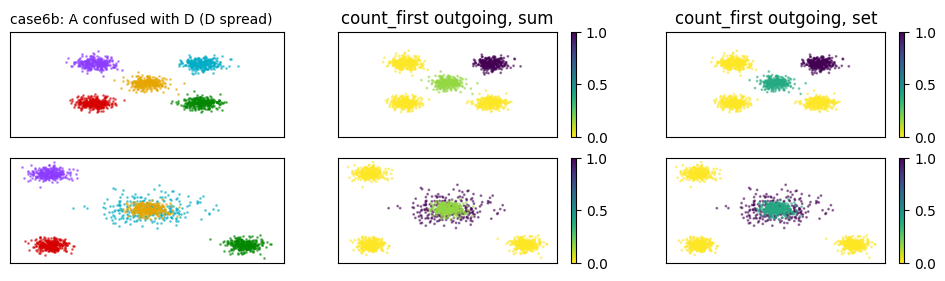

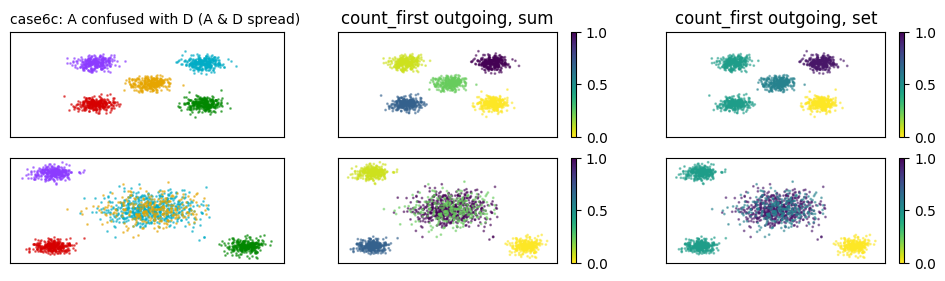

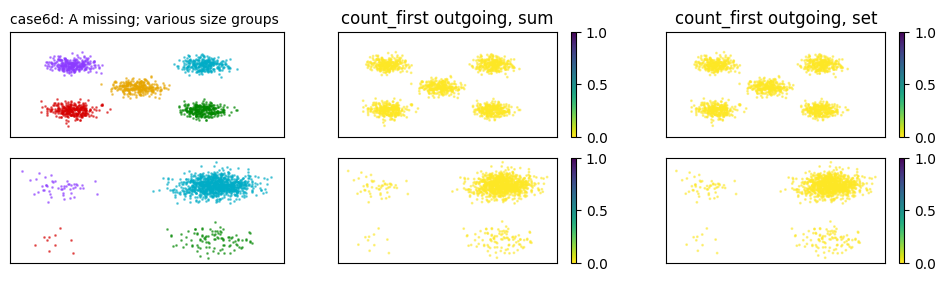

In [340]:
run([
    ("count_first outgoing, sum", functools.partial(count_first, type="outgoing", agg="sum")),
    ("count_first outgoing, set", functools.partial(count_first, type="outgoing", agg="set")),
])

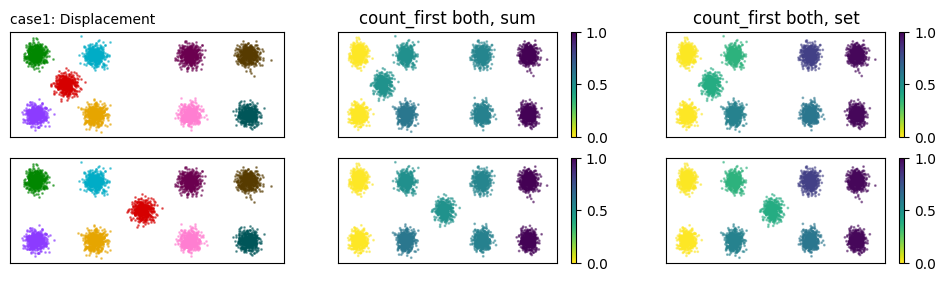

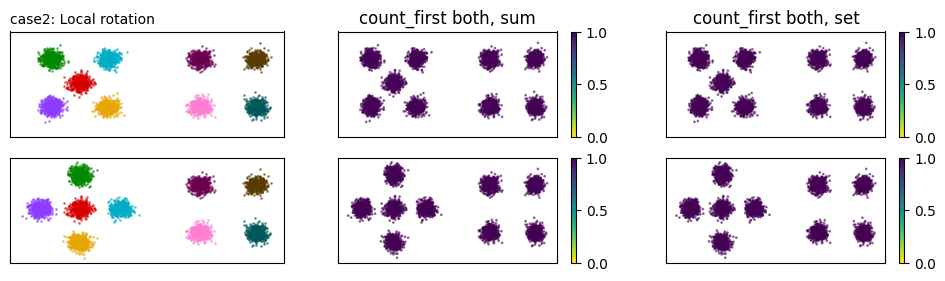

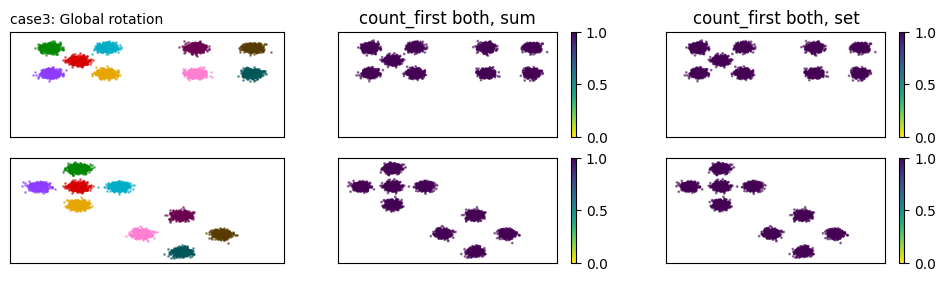

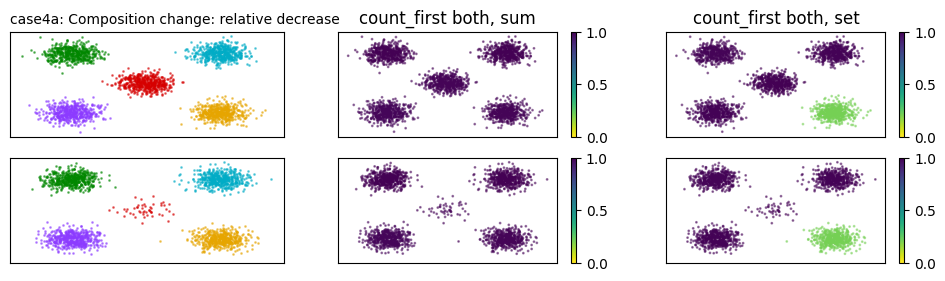

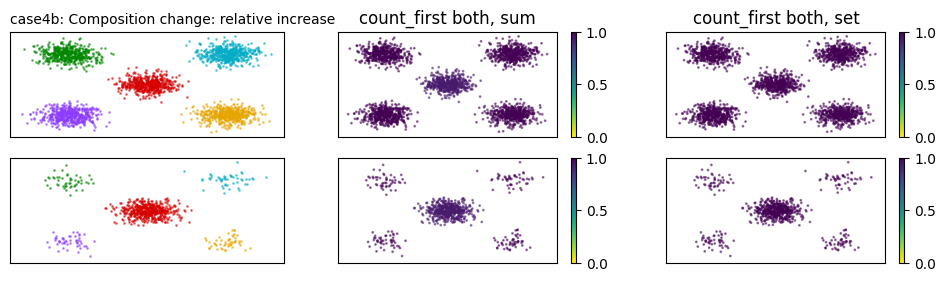

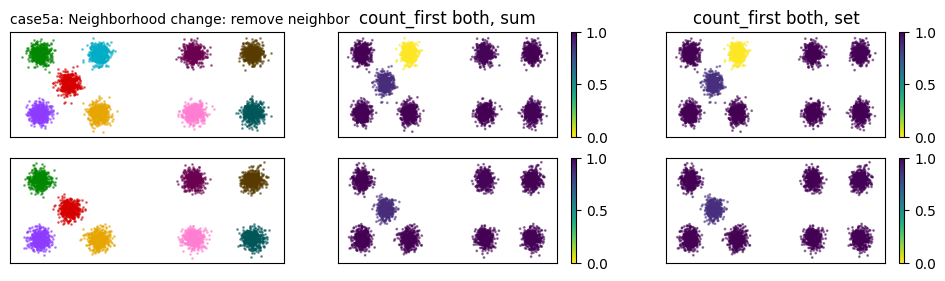

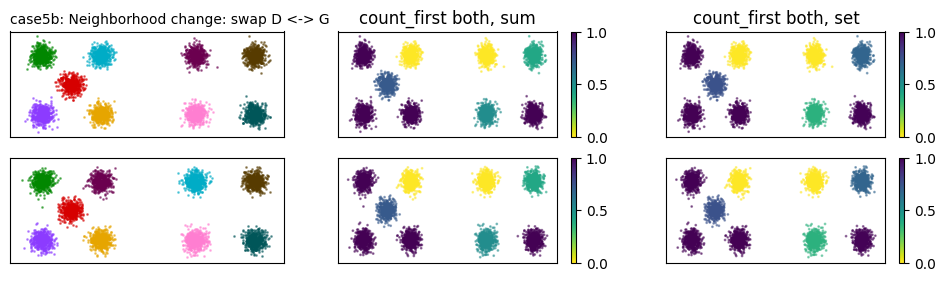

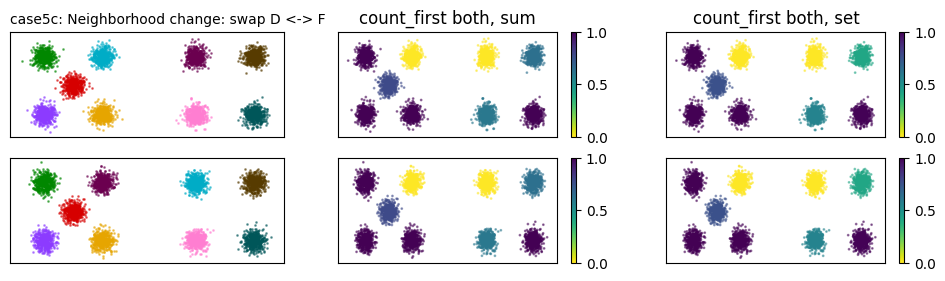

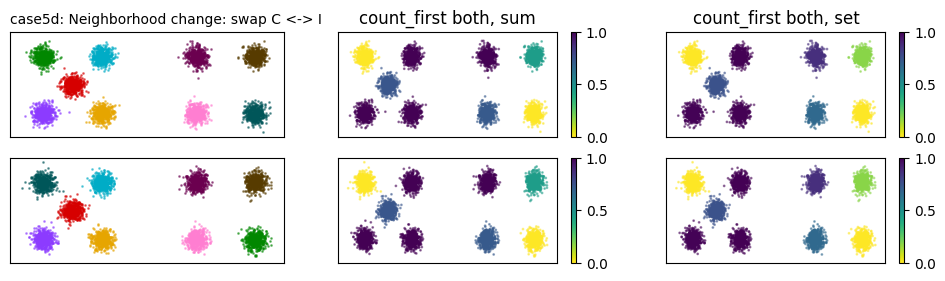

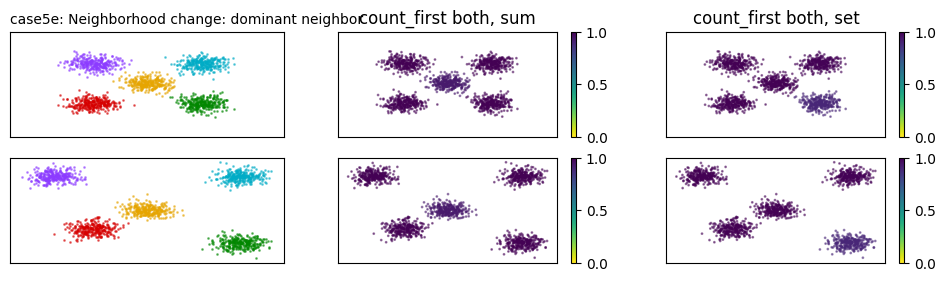

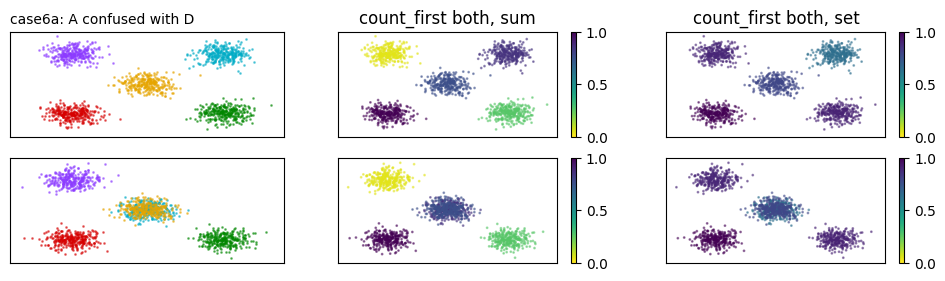

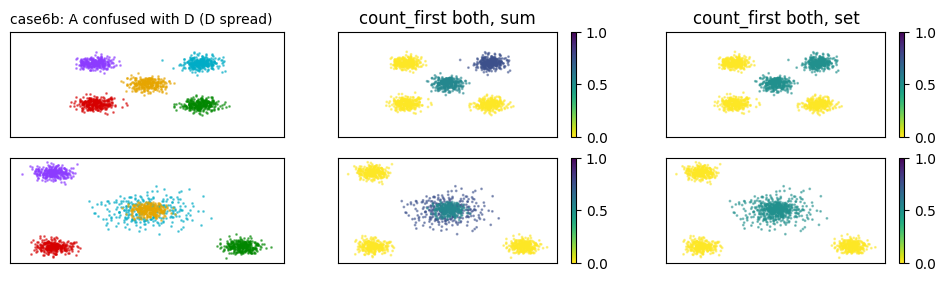

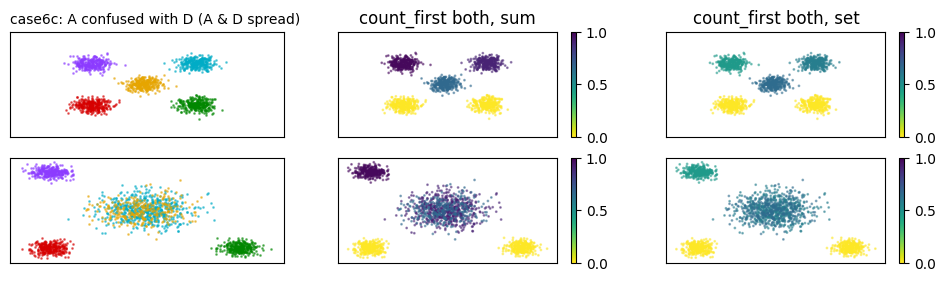

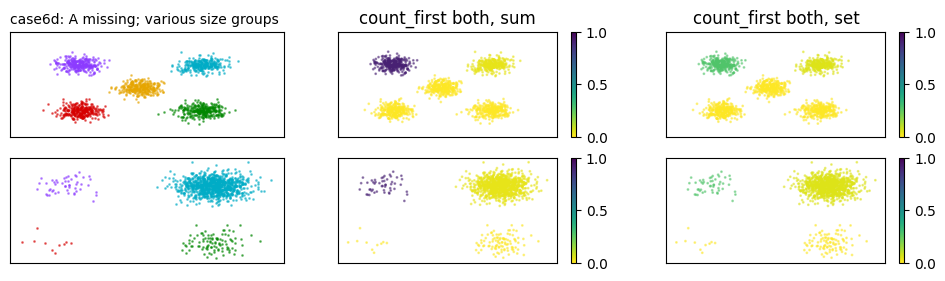

In [341]:
run([
    ("count_first both, sum", functools.partial(count_first, type="both", agg="sum")),
    ("count_first both, set", functools.partial(count_first, type="both", agg="set")),
])

In [319]:
a, b = cases[0]()
res = count_first(a, n=2, kind="set")